In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [77]:
import tensorflow as tf
from tensorflow import keras

In [78]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [79]:
print(x_train.shape,y_train.shape)

(60000, 28, 28) (60000,)


In [80]:
# Preprocessing data 

In [81]:
# Reshaping data :the images are single-channel (grayscale) so there is only one channel in original mnist dataset so 
# but the cnn takes 4d input thus The reshape function is used to add the channel dimension to each image, resulting 
# in a 4D tensor of shape (number of samples, 28, 28, 1).

# Channels: In the context of grayscale images, the channel is 1 because there is only one color channel (gray). 
# For RGB images, there are three channels (red, green, and blue).

# .reshape():  reshape the dimensions of the NumPy array the images from a 2D format (28x28 pixels) to a 3D format (28x28x1). 
# The 1 at the end represents the number of channels.

# x_train.shape[0]: This part ensures that the first dimension of the reshaped array remains the same as the original dataset. The shape[0] is the number of samples in the dataset.

# 28, 28, 1: The new shape of the array after reshaping. The first two dimensions (28, 28) represent the height and width of the image, and the third dimension (1) represents the number of channels.

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [82]:
print(x_train.dtype)

uint8


In [83]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [84]:
print(x_train.dtype) 
# ye karre rahe taki apne ko decimal point values mile so that ploting ke liye acha hoga 

float32


In [85]:
# Normalize
x_train /= 255
x_test /= 255

In [86]:
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])
     

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [87]:
# Defining the model's architecture

In [88]:
from tensorflow.keras.models import Sequential

In [89]:
model = Sequential()

In [90]:
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [91]:
# First layer is convolutional layer 
# 28: number of layers jitne apne ko chaiye (kuchbhi rakh sakte )
# then kernel_size=(3,3):size of kernel pure matrix maise 3x3 lene 
# input shape : dimenstions of apna dataset 
model.add(Conv2D(28, kernel_size=(3,3), input_shape=(28,28,1))) 

In [92]:
# 2nd layer max pooling : 2x2 ka pooling size matlab ek baar mai 2x2 ke matrix par pooling karna 
model.add(MaxPooling2D(pool_size=(2, 2)))

In [93]:
# converting to vectors to pass it into hidden layers 
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers

In [94]:
# hidden layer : dense : sab fully connected with 200 neurons and relu activation func 
# model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation=tf.nn.relu))

In [95]:
# dropout : remove neurons to avoid overfitting 20% neuron is removed 
model.add(Dropout(0.2))

In [96]:
# output llayer 
# model.add(Dense(10,activation='softmax'))
model.add(Dense(10,activation=tf.nn.softmax))

In [97]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 28)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 4732)              0         
                                                                 
 dense_8 (Dense)             (None, 200)               946600    
                                                                 
 dropout_4 (Dropout)         (None, 200)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                2010      
                                                      

In [98]:
# training model 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [99]:
batch_size = 512
epochs = 10

history = model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
118/118 [==============================] - 11s 92ms/step - loss: 0.3991 - accuracy: 0.8894
Epoch 2/10
118/118 [==============================] - 10s 87ms/step - loss: 0.1478 - accuracy: 0.9566
Epoch 3/10
118/118 [==============================] - 10s 81ms/step - loss: 0.0984 - accuracy: 0.9705
Epoch 4/10
118/118 [==============================] - 10s 83ms/step - loss: 0.0734 - accuracy: 0.9781
Epoch 5/10
118/118 [==============================] - 10s 85ms/step - loss: 0.0574 - accuracy: 0.9829
Epoch 6/10
118/118 [==============================] - 10s 84ms/step - loss: 0.0458 - accuracy: 0.9864
Epoch 7/10
118/118 [==============================] - 10s 83ms/step - loss: 0.0394 - accuracy: 0.9879
Epoch 8/10
118/118 [==============================] - 10s 82ms/step - loss: 0.0326 - accuracy: 0.9901
Epoch 9/10
118/118 [==============================] - 10s 84ms/step - loss: 0.0291 - accuracy: 0.9915
Epoch 10/10
118/118 [==============================] - 10s 82ms/step - loss: 0.022

In [100]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(test_loss)
print(test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0410 - accuracy: 0.9858
0.040979038923978806
0.98580002784729


<function matplotlib.pyplot.show(close=None, block=None)>

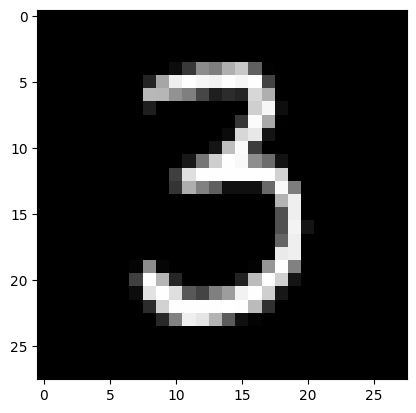

In [102]:
# optional
image = x_train[50]
plt.imshow(np.squeeze(image),cmap='gray')
plt.show

In [103]:

# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


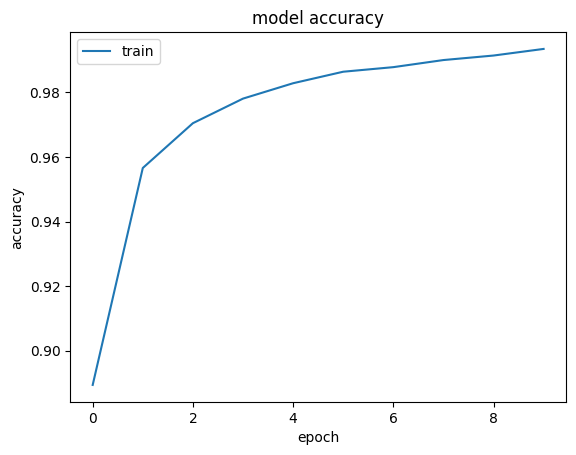

In [104]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


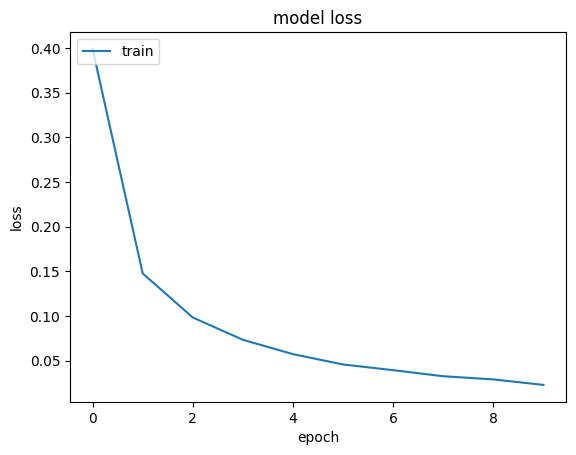

In [105]:
# summarize history for loss
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 60ms/step
2


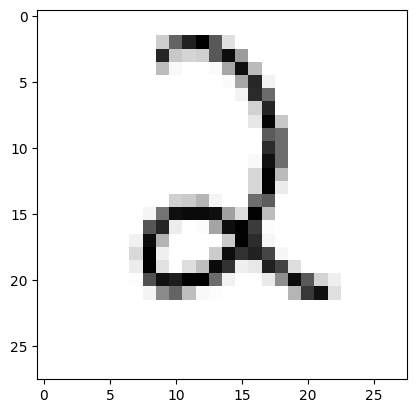

In [106]:

image_index = 47
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
#  is a function from the matplotlib.pyplot library that is used for displaying images.
# basically apan testing ka 4444 index wale image ke dimensions badal rahe 
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
#  model.predict is used to make predictions using the trained neural network model. 
# The input to this function is the image at the specified image_index from the test set
print(pred.argmax())
# pred.argmax() returns the index of the class with the highest predicted probability. 
# This index corresponds to the predicted digit for the given image.